Romica Raisinghani 2021101053 \
Sriteja Reddy Pashya 2021111019

# Topics in Applied Optimization (IIIT, Hyderabad, India)
# Jupyter Notebook Assignment-1 
### Instructor: Dr. Pawan Kumar (IIIT, H) (https://faculty.iiit.ac.in/~pawan.kumar/)
If you are not familiar with Jupyter notebook, before proceeding further, please go and watch this video:

https://www.youtube.com/watch?v=HW29067qVWk

## Regarding assignments
### Deadline: 13 October 2023 
- all the assignment is to be done in this notbook itself
- any proof etc can be done on paper, and image is to be inserted in this notebook
- save this notebook with your roll number and upload it in moodle
- basic familiarity with python is required, brush up if necessary
- you are not allowed to use any existing library for gradient methods; this defeats the purpose of this assignment
- sample output is in the zip file of assignment
- if there are any doubt, then raise it in course moodle site, it may help others
- if you find typo, raise this issue in moodle promptly!
- please avoid copying from others, there may be oral exam to test your knowledge

# Implementation of Recommender System Using Latent Factor Model in Python

Please refer to the class slides for more detail. Also, for full detail, please refer the following main reference:

**[1] Y. Koren, R. Bell, and C. Volinsky, Matrix Factorization Techniques for Recommender Systems, Computer Archive, Volume 42, Issue 8, 2009** 

We first load the necessary libraries: 
1. matplotlib: needed for plotting figures and 
2. numpy needed for doing math

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Now we write the main functions

We write everything inside a class LF, which stands for latent factor. We need the following functions:
1. main
2. train
3. mse
4. sgd
5. predict
6. full_matrix

# Short Tutorial on Recommender Systems
Please see lecture slides for more detail.

## Latent Factor Model
In a recommender systems, we are given an incomplete ratings matrix say R. The $(i,j)$ entry of this matrix is denoted by $r_{ij}.$ 
- We believe that there are dependencies in the matrix, i.e., the matrix is low rank, hence it can be written as a product of low rank matrices. 
- Even if the matrix is not strictly low rank, we believe that certain features are more important than others. In other words, if the ratings matrix were full, then after doing SVD, we get 
$$R = U S V^T$$
some of the singular values were very small, hence the matrix can be approximated well with truncated SVD. Let us consider the first $k$ largest singular vectors, then the truncated SVD is 
$$R \approx U_k S_k V_k.$$
- See IPSC notes for more detail on how to compute SVD or truncated SVD
- For a recomendation problem, for example, movie recomendation or news recommendation or product recommendation, etc, we believe that certain latent features are most important and play a major role in ratings.
- For movie recommendation, for example, latent factors could be comedy, adventure, horror, etc. These features are called latent, because the given data, which is ratings matrix does not explicitely tells about these.
- For recommendation systems, we cannot do SVD, because the matrix $R$ is incomplete! Obviously, we cant treat the missing entries to be zero! Hence, instead of doing SVD, we will consider an error function that consider only the ratings that are given. Let us assume that the ratings matrix can be modelled as a latent factors, i.e., suppose that $$R = PQ, \quad P \in \mathbb{R}^{n \times k}, Q \in \mathbb{R}^{k \times n},$$ then the given rating $$r_{ij} = p_{i*}q_{*j},$$ where $p_{i*}$ denotes the $i$th row of $P,$ and $q_{*j}$ denotes the $j$th column of $Q.$


## Optimization Model
- As mentioned above, we cannot directly do SVD, however, we can indeed create a **loss function** as follows:
$$\mathcal{L}(p_{1*}, p_{2*}, \dots p_{n*}, q_{*1}, q_{*2}, \dots, q_{*n}) = \sum_{(i,j) \in K} (r_{ij} - p_{i*}q_{*j}).$$
- Note above that we see loss function as a function the variables $p_{1*}, p_{2*}, \dots, p_{*n},$ which are row vectors of $P,$ and as the column vectors of $Q,$ which are $q_{*1}, q_{*2}, \dots, q_{*n}.$ This allows us to **vectorize**. Why vectorize?
- In machine learning the weights and their combinations with the given data creates a model. In this case, the model is $PQ.$ Since the $k,$ is a hyperparameter, it is likely that one may choose $P$ and $Q$ to have too many columns, i.e., too many weights are used, this will lead to a large model, and hence leading to **overfitting**. 
If you are not familiar with overfitting, then pause here, and see the video here:

https://www.youtube.com/watch?v=u73PU6Qwl1I

---

- What did you learn from video?
- What is termed as model? 
  - A model is a mathematical or computational representation used to make predictions or infer relationships between variables in data.
- What is the meaning of model being large?
  - A model being "large" typically refers to having a large number of parameters or features, which can lead to increased complexity and potential challenges in training and generalization.
- What is the difference between linear and logistic regression?
  - Linear regression is used for predicting continuous numeric values, while logistic regression is used for binary classification, predicting outcomes like yes/no or true/false.
- What is underfitting?
  - Underfitting occurs when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and test data.
- What is a bias?
  - Bias, in the context of machine learning, refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model or algorithm.
- How do you characterize bias and variance using terms overfitting or underfitting?
  - Overfitting occurs when a model learns the training data too well, including noise or random fluctuations, and performs poorly on unseen data (high variance). Underfitting occurs when a model is too simple and performs poorly on both training and test data (high bias).

---

- A well known way to avoid overfitting is to do regularizations, by penalizing **large model** size. Let us modify our loss function as follows:
$$\mathcal{L}(\cdot) = \sum_{(i,j) \in K} (r_{ij} - p_{i*}q_{*j})^2 + \gamma/2 (\| P \|_F^2 + \| Q \|_F^2)$$
- We have added the term $\gamma/2(\| P \|_F^2 + \| Q \|_F^2).$ It is called **regularization term**
- The parameter $\gamma$ is called the **regularization parameter**
- High $\gamma$ would mean that we don't want big model size; this may help prevent overfitting
- Let $e_{ij}$ denote the error corresponding to each $(ij)$ term, 
$$e_{ij} = r_{ij} - \sum_{s=1}^k p_{is}q_{sj}$$
then let us define the new error term $\tilde{e}$
$$\tilde{e}_{ij} = e_{ij}^2 + \gamma/2 (\|P\|_F^2 + \| Q \|_F^2),$$ 
that is,
$$\tilde{e}_{ij} = (r_{ij} - \sum_{s=1}^k p_{is}q_{sj} )^2 + \gamma/2 (\|P\|_F^2 + \| Q \|_F^2)$$
- Note that $$\mathcal{L}(\cdot) = \sum_{(i,j) \in \mathcal{K}} \tilde{e}_{ij},$$
where $\mathcal{K}$ is the set of all indices for which ratings $r_{ij}$ are available.

## Gradient Method Versus Stochastic Gradient Methods
Following notes are taken from 
https://en.wikipedia.org/wiki/Stochastic_gradient_descent

For large dataset, $k$ and $n$ tend to be large, and computing gradient fully becomes too demanding. In machine learning or statistical estimation, we are usually required to find minimum of the loss functions of the form 
$$Q(w) = 1/n \sum_{j=1}^n Q_j (w)$$
That is loss function as "additive" decomposition. In other words, the loss function is a sum of the loss function where the sum is over the data samples. If $n$ is large, then computing full gradient is computationally demanding. However, if we indeed decide to run the gradient method. Then we recall the following steps:
1. Take initial random weight (possibly random and normally distributed between 0 and 1): $w^0$
2. $w^{i+1} = w^i - \alpha \nabla Q(w^i), \quad i=0, \dots$

Here the gradient $\nabla Q$ is the full gradient in the sense that

 \begin{align}
 \nabla Q(w) = \sum_{i=1}^n \nabla_{w}Q_i(w). \tag{1}
 \end{align}

Here

\begin{align}
\nabla_w Q_i (w) = \begin{bmatrix}
\dfrac{\partial Q_i (w)}{\partial w_1} \\
\dfrac{\partial Q_i (w)}{\partial w_1} \\
\vdots \\
\dfrac{\partial Q_i (w)}{\partial w_n} \\
\end{bmatrix}  \tag{2}
\end{align}

### Stochastic gradient  descent method
Stochastic gradient merthod, in short, SGD is a method (not necessarily descent due to stochasticity, but in expectation is usually is a descent), where the gradient is computed partially. For example, instead of summing for all $i=1...n,$ we can take a random sample, say $j_1,$ and do the update only for this sample as follows:
$$\nabla Q(w) = \nabla_{w}Q_{j_1}(w),$$
that is we have picked just one of the term i.e., $j_1$th term from \eqref{grad}.
Then the SGD update is:
$$w^{i+1} = w^i - \alpha \nabla Q_{j_1}(w^i), \quad i=0, \dots$$
Note that we could have taken few more terms in the sum, and would have updated for a batch. This is called, batched stochastic gradient descent.
It sounds incorrect, isnt it? Why such method may converge? With some basic assumption on the loss function, we can prove some convergence in expectance. More on convergence theory in class!

$\color{red}{\text{Question-0:}}$ Compute the full gradient of the loss function for recommendation system

$\color{red}{\text{Answer:}}$ Loss function for recommendation system is often taken is **MSE (Mean Squared Error)** which is given by:

$$ MSE(\Theta) = \frac{1}{N} \sum_{(u,i)} (r_{ui} - \hat{y}_{ui})^2$$

and the gradient of the loss function is given by:

$$ \nabla MSE(\Theta) = \frac{1}{N} \sum_{(u,i)} 2(r_{ui} - \hat{y}_{ui})\nabla \hat{y}_{ui}$$

- $N$ is the total number of ratings in the training set

- $\hat{y}_{ui}$ is the predicted rating by the recommendation system given by user $u$ to item $i$

- $r_{ui}$ is the actual rating given by user $u$ to item $i$

- $\nabla \hat{y}_{ui}$ is the gradient of the predicted rating by the recommendation system given by user $u$ to item $i$

---

In the following, we derive a stochastic gradient for the loss function for recommender loss.

## Gradient Method for Optimization Problem
- We want to use gradient method to minimize the error. An update in gradient method is given as follows
$$w^{i+1} = w^i - \nabla \mathcal{L}(w^i)$$
- To use gradient method, we need to compute gradient. If we see $\mathcal{L}$ as a function of $p_{ik}$'s and $q_{ki}$'s, then 
$$\dfrac{\partial \mathcal{L}}{\partial p_{is}} = 2e_{is} \dfrac{\partial e_{is}}{\partial p_{is}} + \gamma p_{is} = -2e_{is} q_{sj} + \gamma p_{is}$$
Similarly,
$$\dfrac{\partial \mathcal{L}}{\partial q_{sj}} = 2e_{sj} \dfrac{\partial e_{sj}}{\partial q_{sj}}+\gamma q_{sj} = -2e_{sj}p_{js} + \gamma q_{sj},$$
- The gradient vector $\nabla \mathcal{L}$ is given by
$$\nabla \mathcal{L} = \left(\dfrac{\partial \mathcal{L}}{\partial p_{11}}, \dots, \dfrac{\partial \mathcal{L}}{\partial p_{nk}}, \dfrac{\partial \mathcal{L}}{\partial q_{11}}, \dots, \dfrac{\partial \mathcal{L}}{\partial p_{kn}} \right)$$
- The weights $p_{is}$ can be updated as
$$p_{is} = p_{is} + \alpha (2e_{ij} q_{sj} - \gamma p_{is}) $$
- The weights $q_{sj}$ can be updated as
$$q_{sj} = q_{sj} + \alpha (2e_{ij} p_{js} - \gamma q_{sj}) $$
- We can vectorize $s.$ Finally, the vectorized form of the update looks like:
$$(p_{i+1*}, q_{*j+1})^T = (p_{i*}, q_{*j})^T + \alpha ((2e_{ij} q_{*j} - \gamma p_{i*}), (2e_{ij} p_{j*} - \gamma q_{*j}))^T  $$
- The error at $(p_{i*}, q_{*j})^T$ nedded above can be computed by $$e_{ij} =  r_{ij} - \text{prediction at}~ (i,j) $$
Here prediction at $(i,j)$ can be computed by making a call to predict() function below.

$\color{red}{\text{Question-1:}}$ Why the error is computed this way?

$\color{red}{\text{Answer:}}$ We calculate the error this way, as shown above, because we want our predictions to be as close as possible to the actual values. Furthermore, in the context of solving regression problems, it is a common practice to utilize **Mean Squared Error (MSE)** as the favored **loss function**. This choice aligns with the objective of minimizing the discrepancy between predicted and actual values, a fundamental principle in regression-type scenarios.

---

$\color{red}{\text{Question-2:}}$ Are the updates for $p_{i*}$ and $q_{*j}$ stochastic? Justify.

$\color{red}{\text{Answer:}}$ Yes, the updates for $p_{i*}$ and $q_{j*}$ are considered stochastic in this context. This is because we're computing the loss for a single element within the matrix, as opposed to aggregating and considering the losses for all known entries in the matrix, which is the typical approach in full gradient descent, as we discussed earlier. This stochastic approach allows for more efficient updates, particularly when dealing with large matrices or sparse data, where evaluating the entire gradient can be computationally expensive.

---

# Adding Bias
It is often observed in practice that adding a bias term helps. Let us add the bias term $b$ to the prediction function. The bias term is computed as the mean of the ratings matrix. See the predict function below to see how bias is added.

$\color{red}{\text{Question-2b:}}$ Read the main reference paper and justify why bias is added. Note in this notebook we add global bias. Which other bias term was suggested in the paper?

$\color{red}{\text{Answer:}}$
- In a recommender system, we introduce bias to consider factors unrelated to user-item interactions. These factors, referred to as **biases** or **intercepts**, play a role in the observed differences in rating values. For instance, certain users might consistently assign higher ratings, and some items might inherently receive higher ratings. Including bias in the system enables us to account for these user and item effects, which helps us explain the part of the ratings that can be attributed to these factors. This approach, in turn, allows us to focus on modeling the genuine interactions within the data. In essence, bias correction helps us disentangle the inherent characteristics of users and items from the actual interactions happening in the recommendation system.

- In addition to the main bias term that looks at overall trends, the paper suggests we should also consider two other bias terms: one for **users** and one for **items**. These bias terms are crucial for making our recommendation system work well with real data.

Think of the user bias as capturing how some people tend to rate things higher or lower than others, while the item bias captures how some things naturally get higher or lower ratings.

By including these bias terms, our system can do a better job of understanding why ratings vary. It helps us account for differences in how people rate things and how certain items are perceived, even when there are no direct interactions between users and items involved. Essentially, these bias terms help the system separate out these user and item effects from the actual interactions between users and items.

---


In [2]:
class LF():  
    def __init__(self, R, K, alpha, gamma, epochs):
        """
        Parameters:
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - gamma (float)  : regularization parameter
        """
        
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.gamma = gamma
        self.epochs = epochs

    def train(self, bias=True):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))
        
        # Compute the global bias
        # For Question-6, you may want to initialize additional bias terms here
        self.b = 0
        if bias:
            self.b = np.mean(self.R[np.where(self.R != 0)])
        #self.b_i = TODO 
        #self.b_u = TODO
        
        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]
        
        # Perform stochastic gradient descent for number of epochs
        training_process = []
        for i in range(self.epochs):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("SGD Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        MSE: Compute Mean Square Error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        SGD: Stochastic Graident Descent
        """
        # Create masks for non-zero elements in R
        non_zero_mask = self.R > 0
        
        # Compute predictions for all user-item pairs
        predictions = self.full_matrix()
        
        # Compute errors for all user-item pairs where R is non-zero
        errors = (self.R - predictions) * non_zero_mask
        
        # Compute the gradient for P and Q in one go
        P_gradient = -2 * errors.dot(self.Q) + 2 * self.gamma * self.P
        Q_gradient = -2 * errors.T.dot(self.P) + 2 * self.gamma * self.Q
        
        # Update P and Q using the computed gradients
        self.P -= self.alpha * P_gradient
        self.Q -= self.alpha * Q_gradient
            
            
    def gd(self):
        """
        GD: Graident Descent
        Replace self.sample below to full batch for gradient descent
        Feel free to remove everything, and implement from scratch
        """
        # Create masks for non-zero elements in R
        non_zero_mask = self.R > 0
        
        # Compute predictions for all user-item pairs
        predictions = self.full_matrix()
        
        # Compute errors for all user-item pairs where R is non-zero
        errors = (self.R - predictions) * non_zero_mask
        
        # Compute the gradient for P and Q in one go
        P_gradient = -2 * errors.dot(self.Q) + 2 * self.gamma * self.P
        Q_gradient = -2 * errors.T.dot(self.P) + 2 * self.gamma * self.Q
        
        # Update P and Q using the computed gradients
        self.P -= self.alpha * P_gradient
        self.Q -= self.alpha * Q_gradient
        
        # for i in range(self.num_users):
        #     for j in range(self.num_items):
        #         if self.R[i, j] > 0:
        #             # Compute prediction and error
        #             prediction = self.predict(i, j)
        #             e = self.R[i, j] - prediction

        #             # Create copy of row of P since we need to update it but use older values for update on Q
        #             P_i = self.P[i, :][:]
                
        #             # Update user and item latent feature matrices
        #             for k in range(self.K):
        #                 self.P[i, k] += self.alpha * (2 * e * self.Q[j, k] - self.gamma * self.P[i, k])
        #                 self.Q[j, k] += self.alpha * (2 * e * P_i[k] - self.gamma * self.Q[j, k])            
        
    def predict(self, i, j):
        """
        Prediction: Predicted the rating of user i and item j
        """
        prediction = self.b + self.P[i, :].dot(self.Q[j, :].T)

        return prediction
    
    def full_matrix(self):
        """
        The rating matrix using the biases P and Q
        """
        return self.b + self.P.dot(self.Q.T)


In [3]:
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

lf = LF(R, K=2, alpha=0.1, gamma=0.01, epochs=100)
training_process = lf.train()
print()
print("P x Q:")
print(lf.full_matrix())
print()
print("Global bias:")
print(lf.b)
print()

SGD Iteration: 10 ; error = 0.7324
SGD Iteration: 20 ; error = 1.6716
SGD Iteration: 30 ; error = 1.5174
SGD Iteration: 40 ; error = 1.2987
SGD Iteration: 50 ; error = 1.2360
SGD Iteration: 60 ; error = 1.2348
SGD Iteration: 70 ; error = 1.2478
SGD Iteration: 80 ; error = 1.2595
SGD Iteration: 90 ; error = 1.2677
SGD Iteration: 100 ; error = 1.2731

P x Q:
[[4.57158633 2.81967783 3.7924232  1.4903876 ]
 [3.69435546 4.00388187 1.71627713 1.42070423]
 [1.52260922 1.29379573 3.94228878 4.4785885 ]
 [1.30201294 2.93273286 1.66921163 3.69314776]
 [2.7231819  1.10268999 4.91722931 3.75539891]]

Global bias:
2.769230769230769



# More questions

$\color{red}{\text{Question-3:}}$ Implement the full gradient descent method

$\color{red}{\text{Answer:}}$ Complete gd function above, $\checkmark$

---


$\color{red}{\text{Question-4:}}$ Vectorize the updates of p and q, by vectorizing s (detailed above)

$\color{red}{\text{Answer:}}$ Fill the TODO in code above, $\checkmark$

---

### Using the code below, answer the following:

$\color{red}{\text{Question-5:}}$ Plot the MSE versus iterations for $\alpha=1, \gamma=0.01$ and 100 iterations of SGD

$\color{red}{\text{Answer:}}$ Paste your output and figures here or below this cell

SGD Iteration: 10 ; error = 1.1765
SGD Iteration: 20 ; error = 0.4142
SGD Iteration: 30 ; error = 0.3086
SGD Iteration: 40 ; error = 0.2656
SGD Iteration: 50 ; error = 0.2340
SGD Iteration: 60 ; error = 0.2079
SGD Iteration: 70 ; error = 0.1857
SGD Iteration: 80 ; error = 0.1668
SGD Iteration: 90 ; error = 0.1506
SGD Iteration: 100 ; error = 0.1368


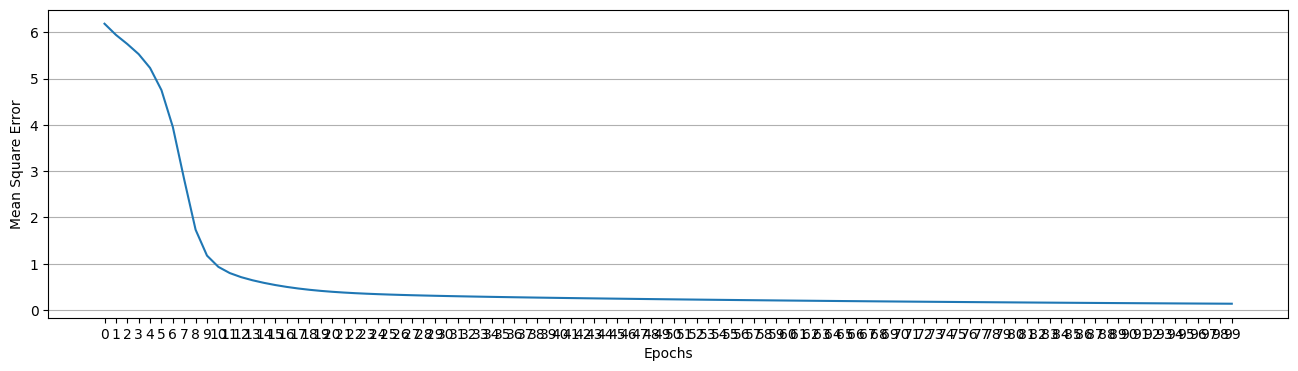

In [4]:
lf = LF(R, K=2, alpha=0.05, gamma=0.01, epochs=100)
training_process = lf.train()
x = [x for x, _ in training_process]
y = [y for _, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")

$\color{red}{\text{Question-6:}}$ Show the plot for 50 iterations, $\alpha=1, \gamma=0.01$ of SGD without bias, i.e., $b=0$

$\color{red}{\text{Answer:}}$ Paste your output and figures here or below this cell $\checkmark$

SGD Iteration: 10 ; error = 4.1176
SGD Iteration: 20 ; error = 1.7097
SGD Iteration: 30 ; error = 1.5564
SGD Iteration: 40 ; error = 1.4029
SGD Iteration: 50 ; error = 1.2491


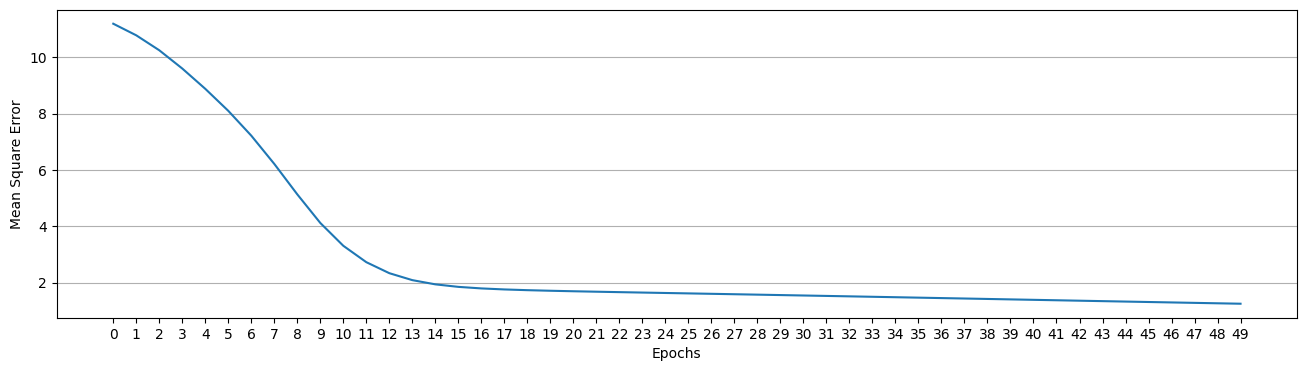

In [5]:
lf = LF(R, K=2, alpha=0.03, gamma=0.01, epochs=50)
training_process = lf.train(bias=False)
x = [x for x, _ in training_process]
y = [y for _, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")

$\color{red}{\text{Question-7:}}$ Repeat above with bias

$\color{red}{\text{Answer:}}$ Paste your output and figures here or below this cell

SGD Iteration: 10 ; error = 2.4507
SGD Iteration: 20 ; error = 0.4518
SGD Iteration: 30 ; error = 0.3893
SGD Iteration: 40 ; error = 0.3624
SGD Iteration: 50 ; error = 0.3399


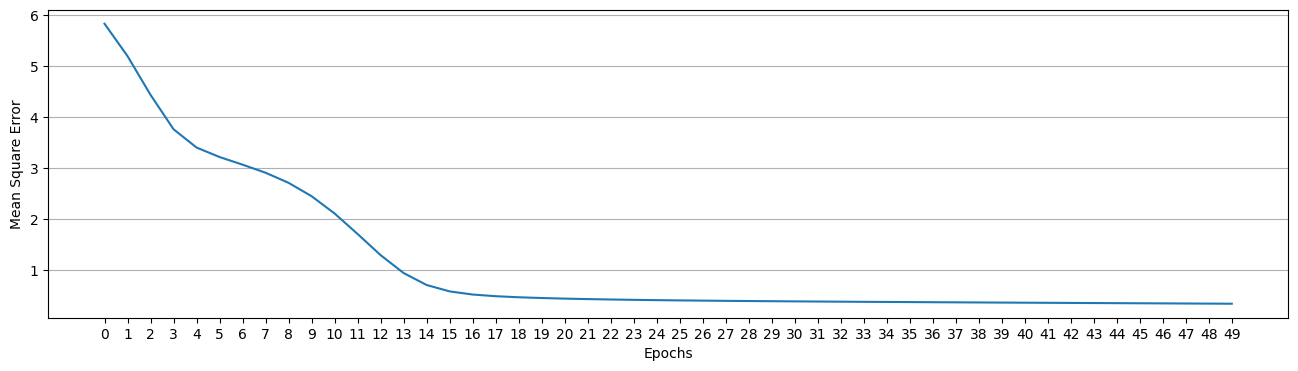

In [6]:
lf = LF(R, K=2, alpha=0.05, gamma=0.01, epochs=50)
training_process = lf.train()
x = [x for x, _ in training_process]
y = [y for _, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")

$\color{red}{\text{Question-8:}}$ Show plots with values of regularization parameters to be 1, 0.1, 0.01, 0.001 and for 50 iterations, and $\alpha=1, \gamma=0.01$

$\color{red}{\text{Answer:}}$ Paste all your plots here or below this cell.

SGD Iteration: 10 ; error = 1.7848
SGD Iteration: 20 ; error = 1.5669
SGD Iteration: 30 ; error = 1.5777
SGD Iteration: 40 ; error = 1.5901
SGD Iteration: 50 ; error = 1.5997
SGD Iteration: 10 ; error = 1.7102
SGD Iteration: 20 ; error = 1.2131
SGD Iteration: 30 ; error = 0.6754
SGD Iteration: 40 ; error = 0.5049
SGD Iteration: 50 ; error = 0.4099
SGD Iteration: 10 ; error = 3.0958
SGD Iteration: 20 ; error = 0.6032
SGD Iteration: 30 ; error = 0.3452
SGD Iteration: 40 ; error = 0.2533
SGD Iteration: 50 ; error = 0.2073
SGD Iteration: 10 ; error = 1.2345
SGD Iteration: 20 ; error = 0.8473
SGD Iteration: 30 ; error = 0.5235
SGD Iteration: 40 ; error = 0.3760
SGD Iteration: 50 ; error = 0.2778


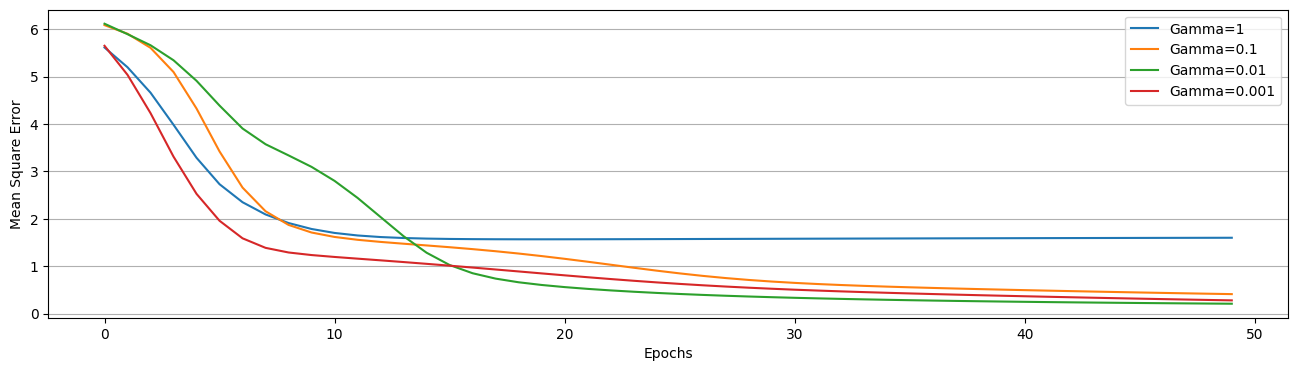

In [7]:
plt.figure(figsize=(16, 4))

for gamma in [1, 0.1, 0.01, 0.001]:
    lf = LF(R, K=2, alpha=0.05, gamma=gamma, epochs=50)
    training_process = lf.train()
    x = [x for x, _ in training_process]
    y = [y for _, y in training_process]
    plt.plot(x, y, label=f"Gamma={gamma}")

plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")
plt.legend()
plt.show()

$\color{red}{\text{Question-9:}}$ Prove that the loss function is not convex. Is the loss function differentiable?

$\color{red}{\text{Answer:}}$ Given below is the **loss function** for recommender systems:
$$\mathcal{L}(p_{1*}, p_{2*}, \dots p_{n*}, q_{*1}, q_{*2}, \dots, q_{*n}) = \sum_{(i,j) \in K} (r_{ij} - p_{i*}q_{*j}).$$
- In the domain of machine learning, models are formed by assigning weights to various features and combining them with the provided dataset. In the specific context of our discussion, we're dealing with a model referred to as PQ. However, it's essential to consider the value of k, which is a hyperparameter. When selecting the values for P and Q, there's a possibility of opting for a configuration that incorporates an excessive number of columns, which translates to an abundance of weights. This can result in the creation of a bulky model, ultimately increasing the risk of overfitting – a situation where the model becomes too complex and starts fitting the training data too closely, potentially leading to poor generalization when applied to unseen data.

- A commonly employed method to mitigate overfitting involves incorporating regularization techniques, which penalize the excessive size of a model. The adjusted loss function takes the following form:
$$\mathcal{L}(\cdot) = \sum_{(i,j) \in K} (r_{ij} - p_{i*}q_{*j})^2 + \frac{\gamma}{2} (\| P \|_F^2 + \| Q \|_F^2)$$
- We have added the term $\frac{\gamma}{2} (\| P \|_F^2 + \| Q \|_F^2).$ It is called **regularization term**
- The parameter $\gamma$ is called the **regularization parameter**
- High $\gamma$ would mean that we don't want big model size; this may help prevent overfitting
- Let $e_{ij}$ denote the error corresponding to each $(ij)$ term, 
$$e_{ij} = r_{ij} - \sum_{s=1}^k p_{is}q_{sj}$$
then let us define the new error term $\tilde{e}$
$$\tilde{e}_{ij} = e_{ij}^2 + \frac{\gamma}{2}  (\|P\|_F^2 + \| Q \|_F^2),$$ 
that is,
$$\tilde{e}_{ij} = (r_{ij} - \sum_{s=1}^k p_{is}q_{sj} )^2 + \frac{\gamma}{2}  (\|P\|_F^2 + \| Q \|_F^2)$$
- Note that $$\mathcal{L}(\cdot) = \sum_{(i,j) \in \mathcal{K}} \tilde{e}_{ij},$$
where $\mathcal{K}$ is the set of all indices for which ratings $r_{ij}$ are available.

To establish the non-convexity of the problem, our objective is to identify two points situated within the allowable region of the optimization challenge. These selected points should possess the characteristic that when we connect them with a line segment, the segment should lie below the graph of the loss function.

Consider two distinct points, denoted as $\mathcal{X_1}$ and $\mathcal{X_2}$, both satisfying the imposed constraints within the feasible region. These points correspond to different matrix configurations. We can articulate their associated loss values in the following manner:
$$\mathcal{L_1} = \sum_{(i,j) \in K} e_{ij}^2(\mathcal{X_1}) + \frac{\gamma}{2} (\| \mathcal{X_1} \|_F^2 + \| Q \|_F^2)$$
$$\mathcal{L_2} = \sum_{(i,j) \in K} e_{ij}^2(\mathcal{X_2}) + \frac{\gamma}{2} (\| \mathcal{X_2} \|_F^2 + \| Q \|_F^2)$$

Now, let:
$$\mathcal{X_3} = \lambda \mathcal{X_1}+(1-\lambda)\mathcal{X_2}$$

Here, we define $\mathcal{X_3}$ as the convex combination of $\mathcal{X_1}$ and $\mathcal{X_2}$ where $\lambda \in (0,1)$.

The following gives the loss function for the convex combination of $\mathcal{X_1}$ and $\mathcal{X_2}$ (i.e. $\mathcal{X_3}$):
$$\mathcal{L_3} = \sum_{(i,j) \in K} e_{ij}^2(\mathcal{X_3}) + \frac{\gamma}{2}  (\| \mathcal{X_3} \|_F^2 + \| Q \|_F^2)$$

Our goal now reduces down to finding such points $\mathcal{X_1}$ and $\mathcal{X_2}$ such that the loss function of their convex combination(i.e $\mathcal{L_3}$) is smaller than the minimum of their respective loss functions(i.e $\mathcal{L_1}$ and $\mathcal{L_2}$). Mathematically:
$$\mathcal{L_3} < min(\mathcal{L_1},\mathcal{L_2})$$ 

This would ultimately prove that the loss function is **not convex**.

- Convexity, as a property, asserts that any local minimum is also the global minimum. However, in the context of matrix factorization, this property doesn't hold true. Instead, there can exist numerous local minima, making the optimization landscape more complex and potentially leading to convergence to different solutions depending on the initial conditions.

- The loss function employed in the gradient descent approach for matrix factorization is not characterized by convexity. This deviation from convexity arises due to the nature of the optimization problem, which necessitates the determination of values for both $\mathcal{p_u}$ and $\mathcal{q_i}$. This dual-variable nature renders the problem non-convex.

- Due to the squared error component's inherent lack of convexity, the loss function used in stochastic gradient descent is non-convex. As a result, this non-convex nature is also inherited by the overall loss function. This phenomenon can be explained by the loss landscape having multiple local minima, which makes optimisation difficult and might produce suboptimal results.

- In contrast, the used loss function is differentiable when using gradient descent for matrix factorization. Because quadratic functions can be differentiated at every point, the loss function's differentiability results from this fact. We can compute the derivatives of the loss function with respect to the parameters $\mathcal{p_u}$ and $\mathcal{q_j}$ thanks to this characteristic. These derivatives are essential because they make it easier to change these parameters throughout the optimisation process, which helps us better understand the loss landscape and identify better solutions.

- Likewise, the loss function in stochastic gradient descent also exhibits differentiability. This is due to its quadratic nature, ensuring differentiability across the entire function domain. Consequently, we can compute gradients of the loss function and leverage them to update the parameters during optimization, enhancing our ability to find optimal solutions within the non-convex landscape.

- Similar to this, stochastic gradient descent's loss function demonstrates differentiability. Because it is quadratic, differentiability is guaranteed throughout the entire function domain. As a result, we can calculate the gradients of the loss function and use them to update the optimisation parameters, improving our ability to locate optimal solutions in the non-convex domain.


---

## Bonus Question

$\color{red}{\text{Question-10:}}$ In the reference paper [1] above, additional bias terms are recommended, implement it

$\color{red}{\text{Answer:}}$ Put your modified function here or below this cell.

$\color{red}{\text{Question-11:}}$ Download the netflix ratings matrix, and run your algorithm.

$\color{red}{\text{Answer:}}$ Put your MSE versus iterations here.

## Thats All Folks! Further Readings or Infomation 
https://www.coursera.org/learn/networks-illustrated/lecture/8GPZT/netflix-timeline

# Keep Recommending!